## Working with actual hurricane data

In [11]:
# importing everything

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request
import rasterio

import shapely

In [2]:
# setting up the figsize so that we don't have to keep entering it when plotting

plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
post_hurricane_gpd = gpd.read_file('post-event-game-grid.geojson')

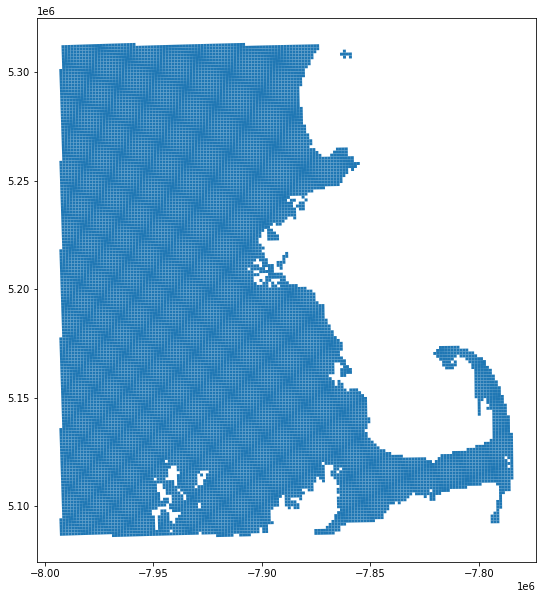

In [4]:
# visualizing the game grid

ax = post_hurricane_gpd.plot()

In [5]:
# view the columns of this dataframe

post_hurricane_gpd.head(1)

,MGRS,kmSQ_ID,GZD,EASTING,NORTHING,MGRS_10km,Shape_Leng,Shape_Le_1,Shape_Area,x_centroid,y_centroid,Health,Utility,Transport,population,SVI,geometry
0,19TBH7264,BH,19T,272000mE,4764000mN,19TBH76,0.042522,0.042522,0.00011,-71.791007,42.999142,9,7,3,15.0,0.2113,"POLYGON ((-7991033.712 5311179.522, -7992397.7..."


### DEMs

In [6]:
# bounds of the game grid

northernmost = post_hurricane_gpd['y_centroid'].max() + 0.1
southernmost = post_hurricane_gpd['y_centroid'].min() - 0.1
easternmost = post_hurricane_gpd['x_centroid'].max() + 0.1
westernmost = post_hurricane_gpd['x_centroid'].min() - 0.1
print(northernmost, southernmost, easternmost, westernmost)

43.105944652548644 41.40002700004018 -69.83111417229865 -71.89999370015873


In [7]:
# reading in the set of DEMs for the game grid

filepath = pd.read_csv('post-event-dems.csv')
filepath

,sourceId,extent,sourceOriginName,boundingBox,sizeInBytes,bestFitIndex,format,downloadURL,previewGraphicURL,prettyFileSize,datasets,title,sourceOriginId,lastUpdated,dateCreated,metaUrl,sourceName,publicationDate
0,5deb32c9e4b02caea0f0ebbb,1 x 1 degree,gda,"{minY:41.9994444436071,minX:-71.0005555562932,...",128354699,0.283969,GeoTIFF,https://prd-tnm.s3.amazonaws.com/StagedProduct...,https://prd-tnm.s3.amazonaws.com/StagedProduct...,122.41 MB,[National Elevation Dataset (NED) 1/3 arc-seco...,USGS 1/3 arc-second n43w071 1 x 1 degree,14451005,2020-03-03,2019-12-06,https://www.sciencebase.gov/catalog/item/5deb3...,ScienceBase,2019-12-16
1,5deb32c9e4b02caea0f0ebbd,1 x 1 degree,gda,"{minY:41.9994444436071,minX:-72.0005555560934,...",489616162,0.229785,GeoTIFF,https://prd-tnm.s3.amazonaws.com/StagedProduct...,https://prd-tnm.s3.amazonaws.com/StagedProduct...,466.93 MB,[National Elevation Dataset (NED) 1/3 arc-seco...,USGS 1/3 arc-second n43w072 1 x 1 degree,14457431,2020-03-03,2019-12-06,https://www.sciencebase.gov/catalog/item/5deb3...,ScienceBase,2019-12-18
2,5deb32b8e4b02caea0f0eb4d,1 x 1 degree,gda,"{minY:40.999444443807,minX:-71.0005555562932,m...",168352354,0.102182,GeoTIFF,https://prd-tnm.s3.amazonaws.com/StagedProduct...,https://prd-tnm.s3.amazonaws.com/StagedProduct...,160.55 MB,[National Elevation Dataset (NED) 1/3 arc-seco...,USGS 1/3 arc-second n42w071 1 x 1 degree,14451007,2020-03-03,2019-12-06,https://www.sciencebase.gov/catalog/item/5deb3...,ScienceBase,2019-12-16
3,5deb32b8e4b02caea0f0eb4f,1 x 1 degree,gda,"{minY:40.999444443807,minX:-72.0005555560934,m...",301588789,0.082685,GeoTIFF,https://prd-tnm.s3.amazonaws.com/StagedProduct...,https://prd-tnm.s3.amazonaws.com/StagedProduct...,287.62 MB,[National Elevation Dataset (NED) 1/3 arc-seco...,USGS 1/3 arc-second n42w072 1 x 1 degree,14643650,2020-03-03,2019-12-06,https://www.sciencebase.gov/catalog/item/5deb3...,ScienceBase,2020-01-31
4,5deb32dbe4b02caea0f0ec2d,1 x 1 degree,gda,"{minY:42.9994444434072,minX:-71.0005555562932,...",328027593,0.003214,GeoTIFF,https://prd-tnm.s3.amazonaws.com/StagedProduct...,https://prd-tnm.s3.amazonaws.com/StagedProduct...,312.83 MB,[National Elevation Dataset (NED) 1/3 arc-seco...,USGS 1/3 arc-second n44w071 1 x 1 degree,14451006,2020-03-03,2019-12-06,https://www.sciencebase.gov/catalog/item/5deb3...,ScienceBase,2019-12-16
5,5deb32b8e4b02caea0f0eb4b,1 x 1 degree,gda,"{minY:40.999444443807,minX:-70.0005555564931,m...",18645141,0.002927,GeoTIFF,https://prd-tnm.s3.amazonaws.com/StagedProduct...,https://prd-tnm.s3.amazonaws.com/StagedProduct...,17.78 MB,[National Elevation Dataset (NED) 1/3 arc-seco...,USGS 1/3 arc-second n42w070 1 x 1 degree,14451008,2020-03-03,2019-12-06,https://www.sciencebase.gov/catalog/item/5deb3...,ScienceBase,2019-12-16
6,5deb32dbe4b02caea0f0ec2f,1 x 1 degree,gda,"{minY:42.9994444448,minX:-72.0005555552,maxY:4...",468192000,0.002601,GeoTIFF,https://prd-tnm.s3.amazonaws.com/StagedProduct...,https://prd-tnm.s3.amazonaws.com/StagedProduct...,446.50 MB,[National Elevation Dataset (NED) 1/3 arc-seco...,USGS 13 arc-second n44w072 1 x 1 degree,14429478,2020-03-03,2019-12-06,https://www.sciencebase.gov/catalog/item/5deb3...,ScienceBase,2019-05-09
7,5deb32dae4b02caea0f0ec2b,1 x 1 degree,gda,"{minY:42.9994444443066,minX:-70.0005555555937,...",70323753,0.000092,GeoTIFF,https://prd-tnm.s3.amazonaws.com/StagedProduct...,https://prd-tnm.s3.amazonaws.com/StagedProduct...,67.07 MB,[National Elevation Dataset (NED) 1/3 arc-seco...,USGS 13 arc-second n44w070 1 x 1 degree,14429271,2020-03-03,2019-12-06,https://www.sciencebase.gov/catalog/item/5deb3...,ScienceBase,2016-06-28


In [8]:
# downloading each DEM

for idx, path in enumerate(filepath['downloadURL']):
    urllib.request.urlretrieve(path, 'post-event-images/dem-orig-{}.tif'.format(idx))
print('Done!')

Done!


In [9]:
# creating each elevation map from the DEMs

!/opt/conda/bin/gdaldem hillshade post-event-images/dem-orig-0.tif post-event-images/dem-hs-0.tif

!/opt/conda/bin/gdaldem hillshade post-event-images/dem-orig-1.tif post-event-images/dem-hs-1.tif

!/opt/conda/bin/gdaldem hillshade post-event-images/dem-orig-2.tif post-event-images/dem-hs-2.tif

!/opt/conda/bin/gdaldem hillshade post-event-images/dem-orig-3.tif post-event-images/dem-hs-3.tif

!/opt/conda/bin/gdaldem hillshade post-event-images/dem-orig-4.tif post-event-images/dem-hs-4.tif

!/opt/conda/bin/gdaldem hillshade post-event-images/dem-orig-5.tif post-event-images/dem-hs-5.tif

!/opt/conda/bin/gdaldem hillshade post-event-images/dem-orig-6.tif post-event-images/dem-hs-6.tif

!/opt/conda/bin/gdaldem hillshade post-event-images/dem-orig-7.tif post-event-images/dem-hs-7.tif

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed
0...10...20...30...40...50...60...70...80...90...100 - done.
ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed
0...10...20...30...40...50...60...70...80...90...100 - done.
ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed
0...10...20...30...40...50...60...70...80...90...100 - done.
ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed
0...10...20...30...40...50...60...70...80...90...100 - done.
ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed
0...10...20...30...40...50...60...70...80...90...100 - done.
ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed
0...10...20...30...40...50...60...70...80...90...100 - done.
ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed
0...10...20...30...40...50...60...70...80...90...100 - done.
ERROR 1: PROJ: proj_

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 10812, 'height': 10812, 'count': 1, 'crs': CRS.from_epsg(4269), 'transform': Affine(9.259259269220298e-05, 0.0, -71.0005555562932,
       0.0, -9.259259269220298e-05, 43.0005555557952)}


AttributeError: module 'rasterio' has no attribute 'plot'

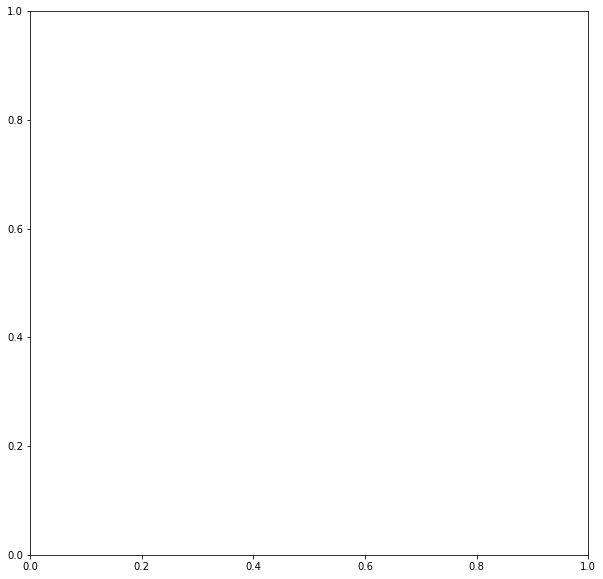

In [12]:
# visualizing one of the elevation maps (sanity check)
# DOESN'T WORK

with rasterio.open('post-event-images/dem-hs-0.tif', 'r') as src:
    print(src.meta)
    hillshade = src.read(1)
    hillshade_mask = src.read_masks(1)
    hillshade_transform = src.profile['transform']
    
    fig, ax = plt.subplots(1,figsize = (10,10))
    
    rasterio.plot.show(np.ma.masked_where(hillshade_mask==0, hillshade), transform=hillshade_transform, ax=ax)
   
    plt.show() 

### OSM